

# AAI612: Deep Learning & its Applications

*Notebook 4.3: Graded Assignment: Mini Project I*

<a href="https://colab.research.google.com/github/harmanani/AAI612/blob/main/Week4/Notebook4.4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assessment

In this assessment, you will train a new model that is able to recognize fresh and rotten fruit. You will need to get the model to a validation accuracy of `92%` in order to pass the assessment, though we challenge you to do even better if you can. You will have the use the skills that you learned in the previous exercises. Specifically, we suggest using some combination of transfer learning, data augmentation, and fine tuning.

## The Dataset

In this exercise, you will train a model to recognize fresh and rotten fruits. Download the dataset from [Kaggle](https://www.kaggle.com/sriramr/fruits-fresh-and-rotten-for-classification). The dataset structure is in the `data/fruits` folder. There are 6 categories of fruits: fresh apples, fresh oranges, fresh bananas, rotten apples, rotten oranges, and rotten bananas. This will mean that your model will require an output layer of 6 neurons to do the categorization successfully. You'll also need to compile the model with `categorical_crossentropy`, as we have more than two categories.

![image.png](attachment:4c8c02c9-0cbe-4048-8d01-cdd5e3cf3fe6.png)<img src="https://github.com/harmanani/AAI612/blob/main/Week4/images/fruits.png?raw=1" style="width: 600px;">

In [1]:
#download data from the folder

!wget https://raw.githubusercontent.com/harmanani/AAI612/a9fbfe6c1bd36ec86071d9589e3b4a035a9afb89/Week4/data.zip
!unzip data.zip


--2025-02-08 10:42:06--  https://raw.githubusercontent.com/harmanani/AAI612/a9fbfe6c1bd36ec86071d9589e3b4a035a9afb89/Week4/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94837216 (90M) [application/zip]
Saving to: ‘data.zip.1’

data.zip.1          100%[===================>]  90.44M   128MB/s    in 0.7s    

2025-02-08 10:42:08 (128 MB/s) - ‘data.zip.1’ saved [94837216/94837216]

Archive:  data.zip
replace data/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data/.DS_Store          
  inflating: __MACOSX/data/._.DS_Store  
  inflating: data/fruits/.DS_Store   
  inflating: __MACOSX/data/fruits/._.DS_Store  
  inflating: data/fruits/train/.DS_Store  
  inflating: __MACOSX/data/fruits/train/._.DS_Store  
  inflating: data/fruits/valid/

## Load ImageNet Base Model

Start with a model pretrained on `ImageNet`. Load the model with the correct weights, set an input shape, and choose to remove the last layers of the model. Remember that images have three dimensions: a height, and width, and a number of channels. Because these pictures are in color, there will be three channels for red, green, and blue. We've filled in the input shape for you. This cannot be changed or the assessment will fail. If you need a reference for setting up the pretrained model, please take a look at [Notebook 4.2](https://github.com/harmanani/AAI612/blob/main/Week4/Notebook%204.2.ipynb) where we implemented transfer learning.

In [2]:
import ssl
from tensorflow import keras

ssl._create_default_https_context = ssl._create_unverified_context


base_model = keras.applications.VGG16(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False)


## Freeze Base Model

Next, we suggest freezing the base model. This is done so that all the learning from the ImageNet dataset does not get destroyed in the initial training.

In [3]:
# Freeze base model
base_model.trainable = False

## Add Layers to Model

Now it's time to add layers to the pretrained model. Pay close attention to the last dense layer and make sure it has the correct number of neurons to classify the different types of fruit.  You may add more layers than specified below.

In [4]:
from tensorflow.keras.layers import Dense
# Create inputs with correct shape
inputs = keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False)

# Add pooling layer or flatten layer
x = keras.layers.GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
# Add final dense layer
outputs = keras.layers.Dense(6, activation = 'softmax')(x)

# Combine inputs and outputs to create model
model = keras.Model(inputs, outputs)


In [5]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,558 (56.64 MB)

 Trainable params: 132,870 (519.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

## Compile Model

Now it's time to compile the model with loss and metrics options. Remember that we're training on a number of different categories, rather than a binary classification problem.

In [6]:
model.compile(loss='categorical_crossentropy', metrics = ['accuracy'])

## Augment the Data

If you'd like, try to augment the data to improve the dataset. There is also documentation for the [Keras ImageDataGenerator class](https://keras.io/api/preprocessing/image/#imagedatagenerator-class). This step is optional, but it may be helpful to get to 92% accuracy.

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
        samplewise_center=True,  # set each sample mean to 0
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,
        brightness_range=[0.2,1.2])





## Load Dataset

Now it's time to load the train and validation datasets. Pick the right folders, as well as the right `target_size` of the images (it needs to match the height and width input of the model you've created).

In [8]:
traindata = '/content/data/fruits/train'
validdata = '/content/data/fruits/valid'


# load and iterate training dataset
train_it = datagen.flow_from_directory(traindata,
                                       target_size=(224,224),
                                       color_mode='rgb',
                                       class_mode="categorical")
# load and iterate validation dataset
valid_it = datagen.flow_from_directory(validdata,
                                      target_size=(224,224),
                                      color_mode='rgb',
                                      class_mode="categorical")

Found 249 images belonging to 6 classes.
Found 66 images belonging to 6 classes.


In [15]:
class_names = list(train_it.class_indices.keys())  # This gets class names

train_labels = []
valid_labels = []

# Iterate through the training generator to collect the labels
for _, labels in train_it:
    train_labels.extend(labels)
    if len(train_labels) >= len(train_it.filenames):
        break

# Iterate through the test generator to collect the labels
for _, labels in valid_it:
    valid_labels.extend(labels)
    if len(valid_labels) >= len(valid_it.filenames):
        break

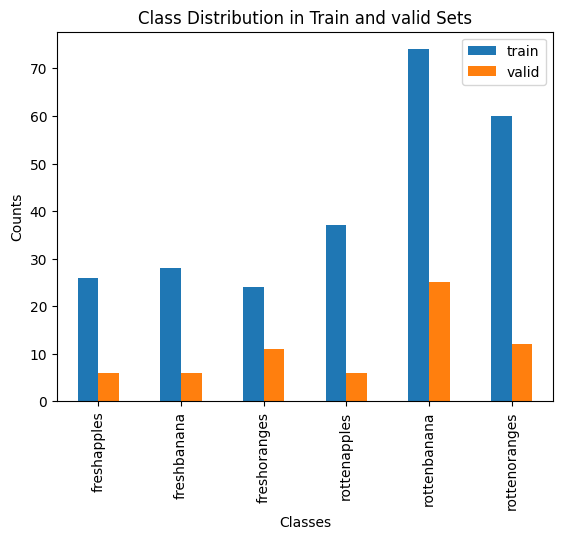

In [17]:
import pandas as pd
train_labels = np.array(train_labels)
valid_labels = np.array(valid_labels)

train_counts = np.sum(train_labels, axis=0)
valid_counts = np.sum(valid_labels, axis=0)

# Create a DataFrame to visualize the counts for both train and test sets
df = pd.DataFrame({
    'train': train_counts,
    'valid': valid_counts
}, index=class_names)

# Plotting the counts using a bar chart
df.plot.bar()
plt.title('Class Distribution in Train and valid Sets')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.show()

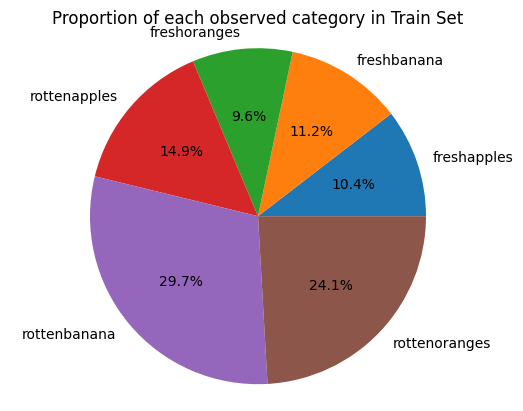

In [18]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0),  # Adjust if you want to "explode" specific slices
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.title('Proportion of each observed category in Train Set')
plt.show()

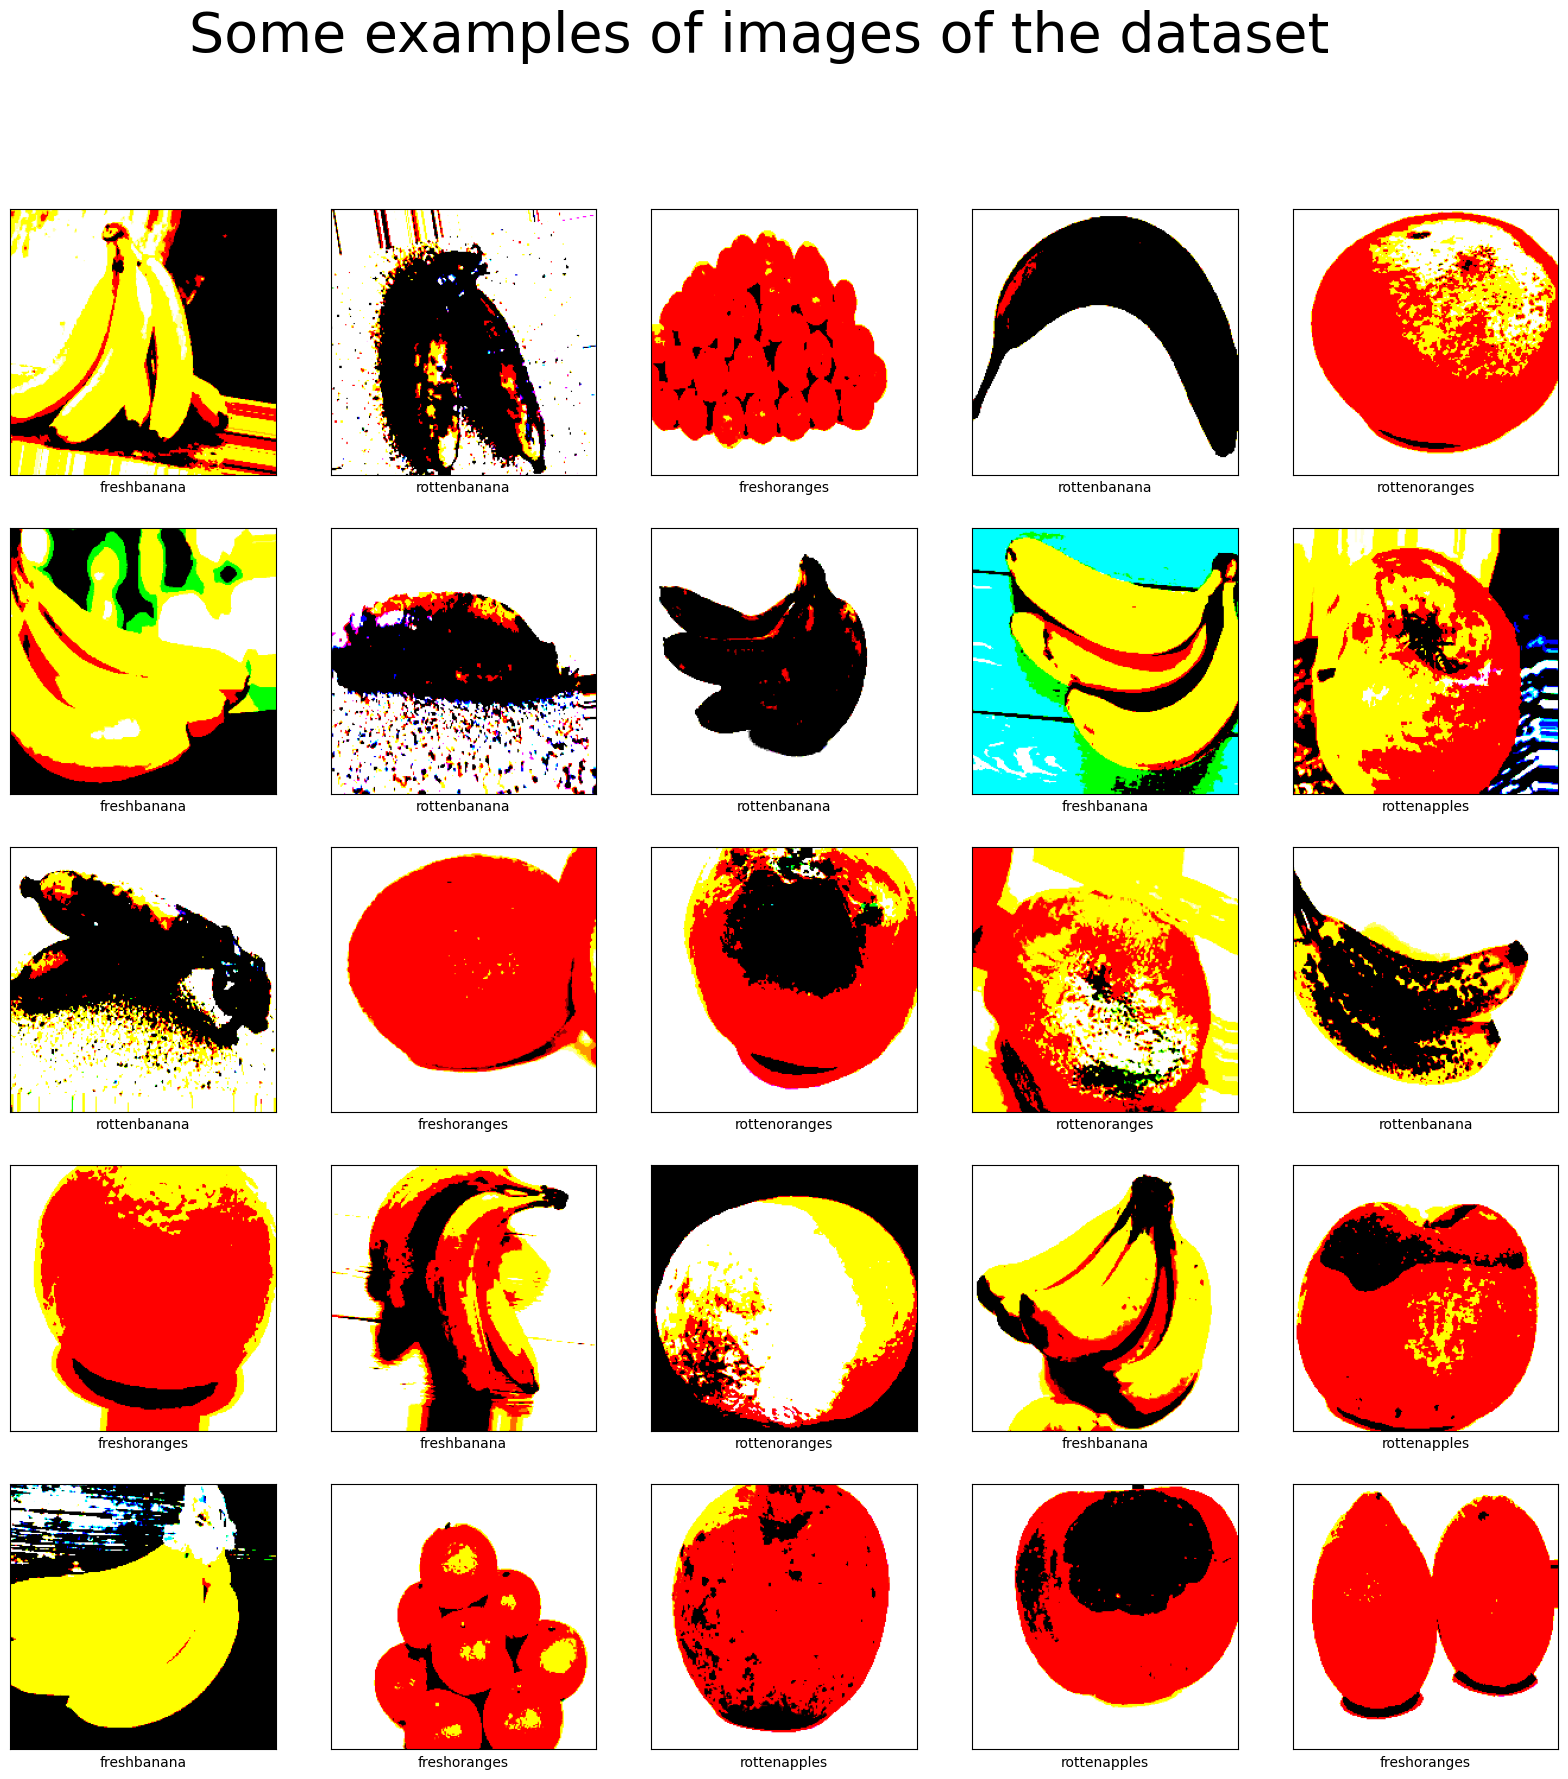

In [19]:
   def display_examples(class_names, images, labels):
    """Display 25 images from the images array with their corresponding labels.
    """
    import matplotlib.pyplot as plt

    fig = plt.figure(figsize=(20, 20))
    fig.suptitle("Some examples of images of the dataset", fontsize=40)
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

images, labels = next(train_it)
labels = np.argmax(labels, axis=1)  # Convert one-hot encoded labels to integers
class_names = list(train_it.class_indices.keys())

display_examples(class_names, images, labels)

## Train the Model

Time to train the model! Pass the `train` and `valid` iterators into the `fit` function, as well as setting your desired number of epochs.

In [9]:
trainmodel = model.fit(train_it,
          validation_data=valid_it,
          steps_per_epoch=int(train_it.samples/train_it.batch_size),
          validation_steps=int(valid_it.samples/valid_it.batch_size),
          epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 166s 24s/step - accuracy: 0.3105 - loss: 3.9752 - val_accuracy: 0.8281 - val_loss: 0.7393
Epoch 2/10
1/7 ━━━━━━━━━━━━━━━━━━━━ 1:49 18s/step - accuracy: 0.7188 - loss: 0.7659

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


7/7 ━━━━━━━━━━━━━━━━━━━━ 53s 6s/step - accuracy: 0.7188 - loss: 0.7659 - val_accuracy: 0.8906 - val_loss: 0.5054
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 210s 32s/step - accuracy: 0.8540 - loss: 0.4170 - val_accuracy: 0.9375 - val_loss: 0.3517
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 53s 6s/step - accuracy: 0.9375 - loss: 0.2198 - val_accuracy: 0.9062 - val_loss: 0.4262
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 217s 23s/step - accuracy: 0.9521 - loss: 0.1919 - val_accuracy: 0.8438 - val_loss: 0.4148
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 53s 6s/step - accuracy: 0.9688 - loss: 0.1085 - val_accuracy: 0.9062 - val_loss: 0.2951
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 270s 33s/step - accuracy: 0.9084 - loss: 0.3250 - val_accuracy: 0.9219 - val_loss: 0.2707
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 51s 6s/step - accuracy: 1.0000 - loss: 0.0486 - val_accuracy: 0.8906 - val_loss: 0.2369
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 212s 24s/step - accuracy: 0.9777 - loss: 0.0867 - val_accuracy: 0.9375 - val_loss: 0.1630
Epoch 10/10

In [20]:
! pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.4/997.4 kB 16.6 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


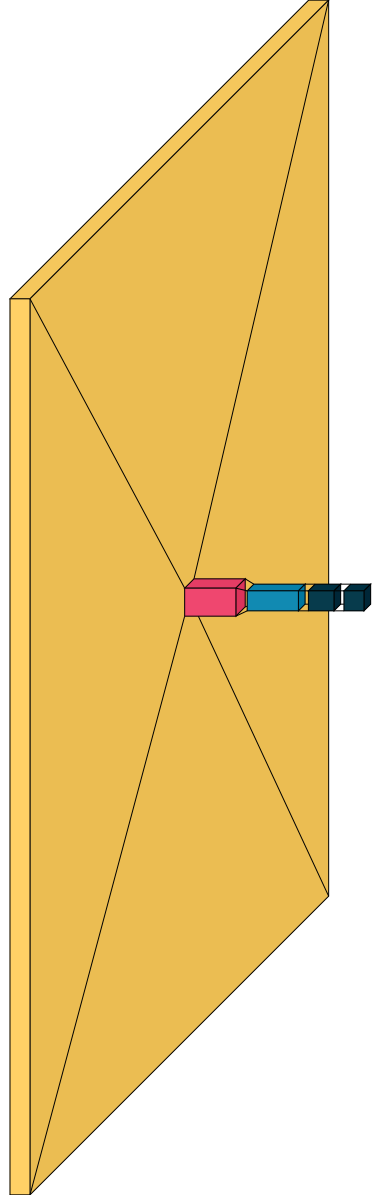

In [21]:
import visualkeras
visualkeras.layered_view(model)

8/8 ━━━━━━━━━━━━━━━━━━━━ 144s 18s/step - accuracy: 0.9929 - loss: 0.0600
Training Accuracy: 99.20%, Loss: 0.0544


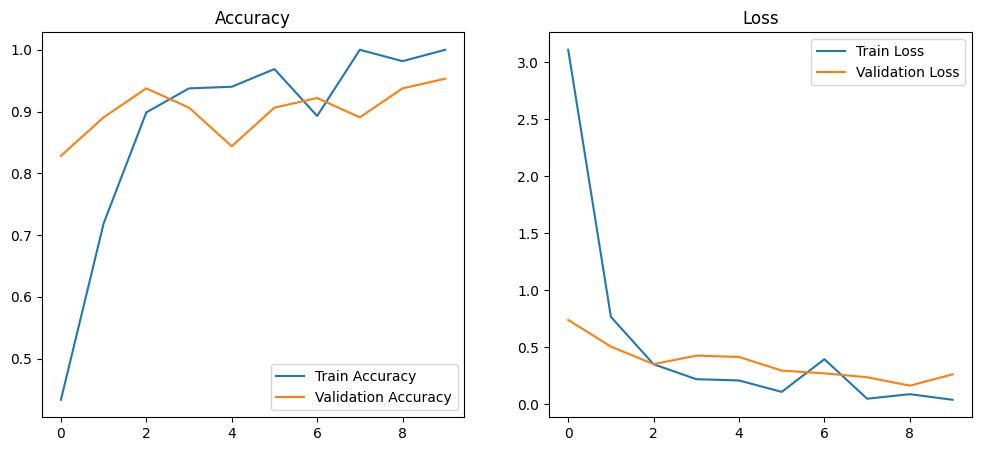

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
# Evaluate Data Training
train_loss, train_acc = model.evaluate(train_it)
print(f"Training Accuracy: {train_acc * 100:.2f}%, Loss: {train_loss:.4f}")

# Visualisasi Kurva Akurasi dan Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(trainmodel.history['accuracy'], label='Train Accuracy')
plt.plot(trainmodel.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(trainmodel.history['loss'], label='Train Loss')
plt.plot(trainmodel.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()


In [12]:
import numpy as np
# Classification Report Training
train_predictions = np.argmax(model.predict(train_it), axis=1)
true_train_labels = train_it.classes
train_class_names = list(train_it.class_indices.keys())

print("Classification Report (Training):")
print(classification_report(true_train_labels, train_predictions, target_names=train_class_names))

8/8 ━━━━━━━━━━━━━━━━━━━━ 144s 18s/step
Classification Report (Training):
               precision    recall  f1-score   support

  freshapples       0.21      0.19      0.20        26
  freshbanana       0.11      0.11      0.11        28
 freshoranges       0.15      0.17      0.16        24
 rottenapples       0.16      0.16      0.16        37
 rottenbanana       0.32      0.32      0.32        74
rottenoranges       0.27      0.27      0.27        60

     accuracy                           0.23       249
    macro avg       0.20      0.20      0.20       249
 weighted avg       0.23      0.23      0.23       249



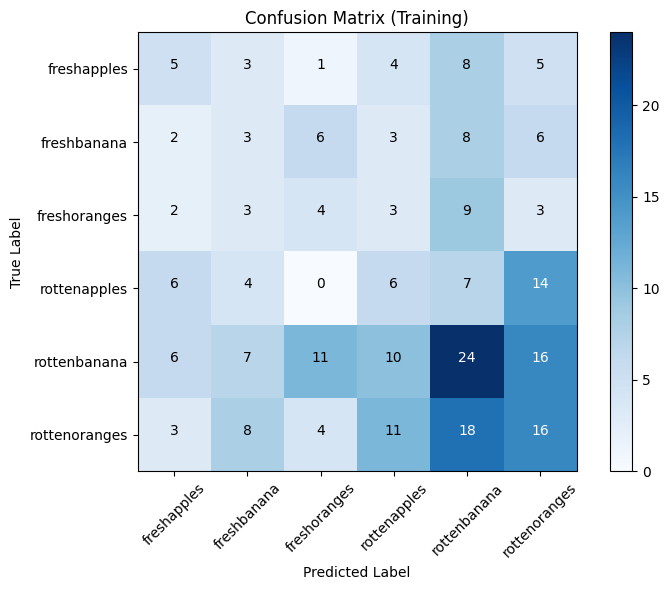

In [13]:
# Confusion Matrix
conf_matrix_train = confusion_matrix(true_train_labels, train_predictions)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_train, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Training)')
plt.colorbar()
tick_marks = np.arange(len(train_class_names))
plt.xticks(tick_marks, train_class_names, rotation=45)
plt.yticks(tick_marks, train_class_names)

for i in range(conf_matrix_train.shape[0]):
    for j in range(conf_matrix_train.shape[1]):
        plt.text(j, i, format(conf_matrix_train[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix_train[i, j] > conf_matrix_train.max() / 2. else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()


In [14]:

# Perhitungan mAP dan IoU untuk Training
from sklearn.metrics import average_precision_score, jaccard_score

# Convert ke One-Hot Encoding untuk mAP
true_train_labels_one_hot = np.eye(len(train_class_names))[true_train_labels]
train_predictions_prob = model.predict(train_it)

# Mean Average Precision (mAP)
mAP_train = average_precision_score(true_train_labels_one_hot, train_predictions_prob, average="macro")
print(f"Mean Average Precision (Training): {mAP_train:.4f}")

# Intersection over Union (IoU)
IoU_train = jaccard_score(true_train_labels, train_predictions, average="macro")
print(f"Intersection over Union (IoU) (Training): {IoU_train:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 141s 18s/step
Mean Average Precision (Training): 0.1780
Intersection over Union (IoU) (Training): 0.1151


## Unfreeze Model for Fine Tuning

If you have reached 92% validation accuracy already, this next step is optional. If not, we suggest fine tuning the model with a very low learning rate.

In [30]:
# Unfreeze the base model
base_model.trainable = True

# Compile the model with a low learning rate
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = .00001),  # Very low learning rate
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [31]:

trainmodel1 = model.fit(train_it,
          validation_data=valid_it,
          steps_per_epoch=int(train_it.samples/train_it.batch_size),
          validation_steps=int(valid_it.samples/valid_it.batch_size),
          epochs=10)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:780: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


7/7 ━━━━━━━━━━━━━━━━━━━━ 475s 66s/step - binary_accuracy: 0.9924 - loss: 0.1868 - val_binary_accuracy: 0.9870 - val_loss: 0.1006
Epoch 2/10
1/7 ━━━━━━━━━━━━━━━━━━━━ 6:24 64s/step - binary_accuracy: 0.9896 - loss: 0.0821

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


7/7 ━━━━━━━━━━━━━━━━━━━━ 99s 6s/step - binary_accuracy: 0.9896 - loss: 0.0821 - val_binary_accuracy: 0.9766 - val_loss: 0.1220
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 563s 76s/step - binary_accuracy: 0.9990 - loss: 0.0461 - val_binary_accuracy: 0.9896 - val_loss: 0.0719
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 142s 13s/step - binary_accuracy: 0.9896 - loss: 0.0751 - val_binary_accuracy: 0.9870 - val_loss: 0.0675
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 502s 68s/step - binary_accuracy: 1.0000 - loss: 0.0246 - val_binary_accuracy: 0.9792 - val_loss: 0.0972
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 95s 6s/step - binary_accuracy: 1.0000 - loss: 0.0159 - val_binary_accuracy: 0.9870 - val_loss: 0.0597
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 564s 74s/step - binary_accuracy: 0.9991 - loss: 0.0248 - val_binary_accuracy: 0.9896 - val_loss: 0.0781
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 140s 13s/step - binary_accuracy: 1.0000 - loss: 0.0325 - val_binary_accuracy: 0.9948 - val_loss: 0.0435
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━

## Evaluate the Model

Hopefully, you now have a model that has a validation accuracy of 92% or higher. If not, you may want to go back and either run more epochs of training, or adjust your data augmentation.

## Discussion

8/8 ━━━━━━━━━━━━━━━━━━━━ 167s 21s/step - binary_accuracy: 1.0000 - loss: 0.0076
Training Accuracy (after fine-tuning): 100.00%, Loss: 0.0096


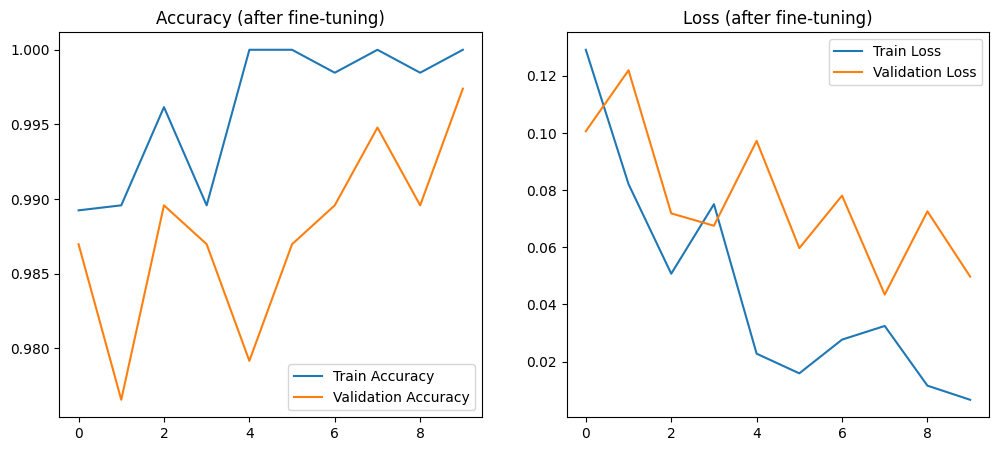

8/8 ━━━━━━━━━━━━━━━━━━━━ 152s 18s/step
Classification Report (Training - after fine-tuning):
               precision    recall  f1-score   support

  freshapples       0.08      0.08      0.08        26
  freshbanana       0.11      0.11      0.11        28
 freshoranges       0.09      0.08      0.09        24
 rottenapples       0.24      0.24      0.24        37
 rottenbanana       0.36      0.36      0.36        74
rottenoranges       0.23      0.23      0.23        60

     accuracy                           0.23       249
    macro avg       0.18      0.18      0.18       249
 weighted avg       0.23      0.23      0.23       249



In [35]:

train_loss, train_acc = model.evaluate(train_it)
print(f"Training Accuracy (after fine-tuning): {train_acc * 100:.2f}%, Loss: {train_loss:.4f}")

# Visualisasi Kurva Akurasi dan Loss after fine-tuning
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(trainmodel1.history['binary_accuracy'], label='Train Accuracy')
plt.plot(trainmodel1.history['val_binary_accuracy'], label='Validation Accuracy')
plt.title('Accuracy (after fine-tuning)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(trainmodel1.history['loss'], label='Train Loss')
plt.plot(trainmodel1.history['val_loss'], label='Validation Loss')
plt.title('Loss (after fine-tuning)')
plt.legend()

plt.show()

# Classification Report Training after fine-tuning
train_predictions = np.argmax(model.predict(train_it), axis=1)
true_train_labels = train_it.classes
train_class_names = list(train_it.class_indices.keys())

print("Classification Report (Training - after fine-tuning):")
print(classification_report(true_train_labels, train_predictions, target_names=train_class_names))




In [39]:
print(f"Training Accuracy (after fine-tuning): {train_acc * 100:.2f}%, Loss: {train_loss:.4f}")
valid_loss, valid_acc = model.evaluate(valid_it)
print(f"Valid Accuracy (after fine-tuning): {valid_acc * 100:.2f}%, Loss: {valid_loss:.4f}")

# Conclusion
final_training_accuracy = train_acc * 100
final_valid_accuracy = valid_acc * 100
print("\nModel Training Conclusion:")
print(f"The model achieved {final_training_accuracy:.2f}% training accuracy and {final_valid_accuracy:.2f}% validation accuracy.")
print("Fine-tuning with a low learning rate helped to further improve model performance.")


Training Accuracy (after fine-tuning): 100.00%, Loss: 0.0096
3/3 ━━━━━━━━━━━━━━━━━━━━ 44s 11s/step - binary_accuracy: 0.9897 - loss: 0.0780
Valid Accuracy (after fine-tuning): 98.99%, Loss: 0.0850

Model Training Conclusion:
The model achieved 100.00% training accuracy and 98.99% validation accuracy.
Fine-tuning with a low learning rate helped to further improve model performance.


# Summary

The mini project notebook trains a deep learning model to classify images of fresh and rotten fruits, the fruits where given in six categories (fresh apples, oranges, and bananas and rotten apples, oranges, and bananas). the given data set was tarin data folder and valid data folder where each folder consistes of the 6 categories.
It leverages transfer learning using a pre-trained VGG16 model on ImageNet, with output layer of 6 neurons, we did freez the base model and adding custom layers for the fruit classification task.
Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴───────────────────


Data augmentation techniques are employed to improve model robustness. we used ImageDataGenerator and iterate through the train and valid folders.

The model is trained and evaluated, with visualizations of accuracy, loss, and a confusion matrix provided.


last step was to Fine-tuning with a low learning rate is performed to further enhance performance.

Results:

Training model before fine-tune at epoch 10:
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 53s 6s/step - accuracy: 1.0000 - loss: 0.0393 - val_accuracy: 0.9531 - val_loss: 0.2621

Training model after fine-tune at epoch 10:
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 142s 13s/step - binary_accuracy: 1.0000 - loss: 0.0066 - val_binary_accuracy: 0.9974 - val_loss: 0.0498
the validation accuracy increased.

As conclusion the model performs great with Training Accuracy (after fine-tuning): 100.00%, Loss: 0.0096
Valid Accuracy (after fine-tuning): 98.99%, Loss: 0.0850